In [1]:
# My code
import fast_gillespie as fg
import fast_gillespie_viz as fgv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

mean_num_monomers =  100.0
mean_num_interactions =  50.0


Progress:   0%|          | 0/30000 [00:00<?, ?it/s]

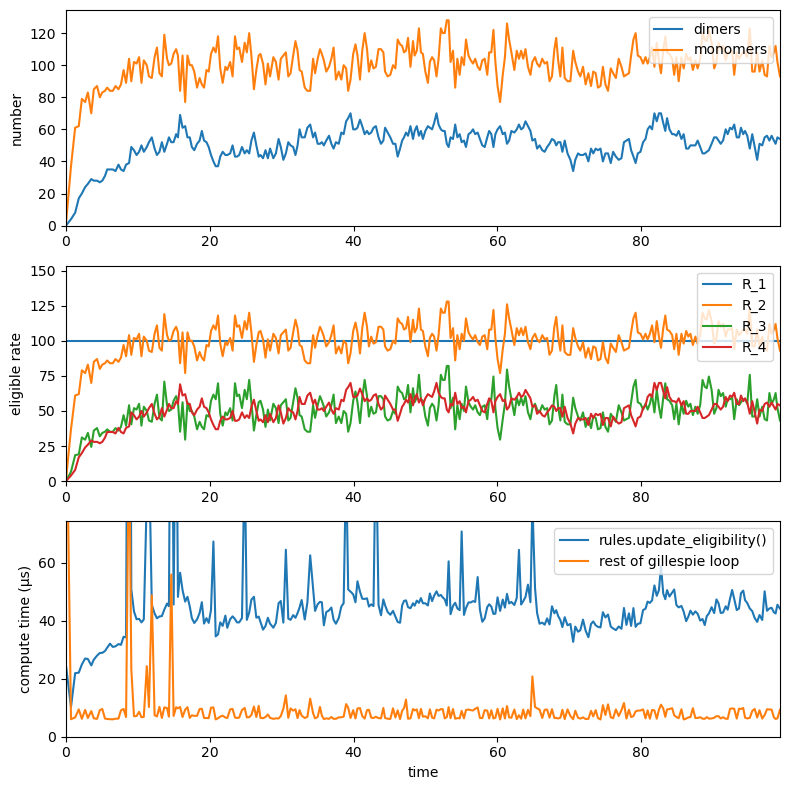

In [2]:
# Define linear homodimer

# # Rates from preprint
# rate1 = 200.0   # => mean_num_monomers = 200
# rate2 = 1.0
# rate3 = 0.03 # = mean_num_interactions/(mean_num_monomers*(mean_num_monomers-1)/2)
# rate4 = 1.0
# mean_num_monomers = rate1
# mean_num_interactions = rate3 * mean_num_monomers * (mean_num_monomers-1)/2

# Rates in terms of interpretable quantities
mean_num_monomers = 100.0
mean_num_interactions = 50.0
rate1 = mean_num_monomers
rate2 = 1.0
rate3 = mean_num_interactions/(mean_num_monomers*(mean_num_monomers-1)/2)
rate4 = 1.0

# Print out rate-determining quantities
print('mean_num_monomers = ', mean_num_monomers)
print('mean_num_interactions = ', mean_num_interactions)

# Create fields
A = fg.Field(name='A', index_dim=1)
a = fg.Field(name='a', index_dim=1)
I = fg.Field(name='I', index_dim=2, index_constraint=lambda i: i[0] < i[1])

# Create rules
R_1 = fg.MonomerCreationRule(name='R_1', rate=rate1, particle=A, sites=[a])
R_2 = fg.MonomerAnnihilationRule(name='R_2', rate=rate2, particle=A, sites=[a])
R_3 = fg.HomotypicInteractionCreationRule(name='R_3', rate=rate3, A=A, a=a, I=I)
R_4 = fg.HomotypicInteractionAnnihilationRule(name='R_4', rate=rate4, A=A, a=a, I=I)       

# Define fock space and rules
space = fg.FockSpace(fields=[A, a, I])
rules = fg.RuleSet(rules=[R_1, R_2, R_3, R_4])

# Define summary stats to record
def summary_stats_func():
    stats_dict = dict(
        dimers=len(I.indices),
        monomers=len(A.indices) - len(a.indices),
    )
    return stats_dict

# Define, initialize, and run simulation
sim = fg.Simulation(space=space, rules=rules, custom_stats_func=summary_stats_func)
sim.initialize_state()
sim.run(num_steps=30_000, record_every=100)

# Show simulation stats
fgv.show_sim_stats(sim, x_is_time=True)

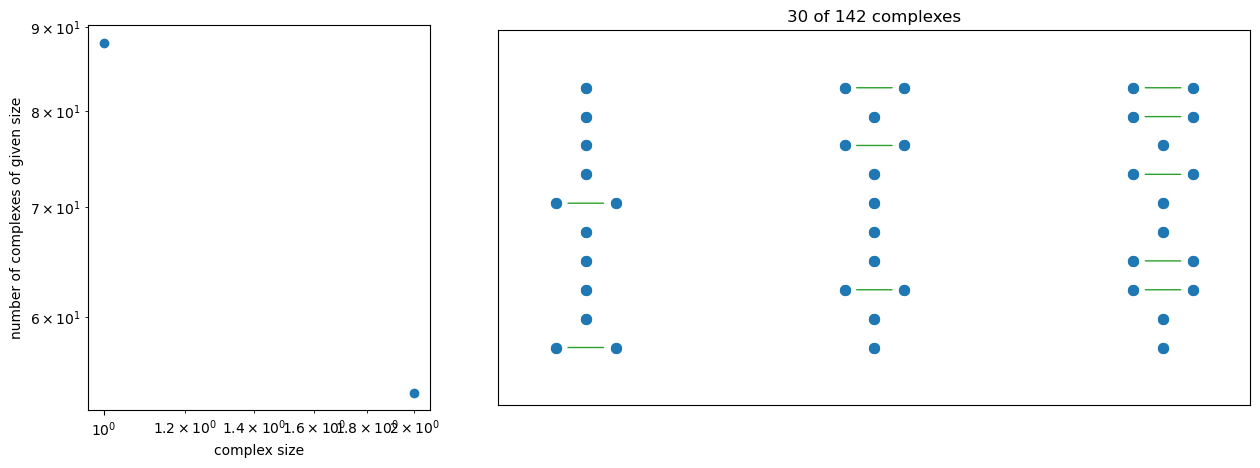

In [3]:
# Compute nodes and edges
nodes=[(f'A_{i[0]}',{'class':'A'}) for i in A.indices] 
edges=[(f'A_{i}', f'A_{j}', {'class':'I'}) for i,j in I.indices]

# Specify properties for visualize_complexes
node_properties={
    'A': {'node_color': 'C0', 'node_shape': 'o', 'node_size':50}
}
edge_properties= {
    'I': {'edge_color': 'C2', 'width': 1, 'arrowstyle': '-', 'arrowsize': 10}
}

# Make figure
fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(1, 3, figure=fig)

# Plot complex sizes
ax = fig.add_subplot(gs[0, 0])
fgv.show_complex_sizes(nodes, edges, ax=ax)

# Illustrate complexes
ax = fig.add_subplot(gs[0, 1:])
fgv.visualize_complexes(
    nodes=nodes,
    edges=edges,
    node_properties=node_properties,
    edge_properties=edge_properties,
    grid_shape=(10,3),
    x_spacing=5,
    y_spacing=0.5,
    ax=ax,
    iterations=1000,
    learning_rate=0.1)